# PCA

Analiza glavnih komponenti (Principal Component Analysis, PCA) je nenadgledana procedura za izgradnju novih linearno nekorelisanih atributa od postojecih.<br> 
Te nove atribute zovemo glavne komponente. <br>
Prva glavna komponenta je vektor koji ima najvecu mogucu varijansu, tj. duz ovog pravca podaci najvise variraju.<br> 
Svaka sledeca glavna komponenta je normalna u odnosu na sve prethodne i opet objasnjava najveci moguci preostali deo varijanse podataka.

Nakon ove transformacije mozemo da uzmemo prvih k glavnih komponenti i na taj nacin smanjimo dimenzionalnost skupa podataka, a da izgubimo sto manji deo informacija.

**🧠 Šta je PCA?**

> **PCA** je metoda za smanjenje dimenzionalnosti podataka.

Drugim rečima:

> Imaš mnogo atributa → PCA ih „sabije“ u manji broj novih atributa koji nose najviše informacije.

📌 Bitno:

- `PCA je nenadgledana metoda`

- `NE koristi ciljnu promenljivu`

In [1]:
!mamba install scikit-learn

mambajs 0.19.13

Specs: xeus-python, numpy, matplotlib, pillow, ipywidgets>=8.1.6, ipyleaflet, scipy, scikit-learn
Channels: emscripten-forge, conda-forge

Solving environment...
Solving took 1.1494000000953675 seconds
  Name                          Version                       Build                         Channel                       
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
+ brotli-python                 1.2.0                         py313h33caa6c_0               emscripten-forge              
+ certifi                       2026.1.4                      pyhd8ed1ab_0                  conda-forge                   
+ charset-normalizer            3.4.4                         pyhd8ed1ab_0                  conda-forge                   
+ idna                          3.11                          pyhd8ed1ab_0                  conda-forge                   
+ joblib                        1.5.3        

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [10]:
X = data['data']
y = data['target']
feature_names = data['feature_names']
class_names = data['target_names']

In [12]:
X.shape

(569, 30)

In [14]:
y.shape

(569,)

Sam PCA je nenadgledan, ali ako zelimo da primenimo neki klasifikacioni algoritam nakon njega, moramo prvo da podelimo na trening i test

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123, stratify=y)

In [17]:
X_train.shape

(426, 30)

In [18]:
X_test.shape

(143, 30)

<b>Preduslov za primenu PCA je da svi atributi imaju prosek 0

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
from sklearn.decomposition import PCA

Za argument `n_components` mozemo da posaljemo:

- int - koliko glavnih komponenti zelimo
- float - koliki udeo varijanse zelimo da objasnimo

In [22]:
pca = PCA(n_components=2)

In [23]:
pca.fit(X_train)

,"n_components n_components: int, float or 'mle', default=NoneNumber of components to keep.if n_components is not set all components are kept:: n_components == min(n_samples, n_features)If ``n_components == 'mle'`` and ``svd_solver == 'full'``, Minka'sMLE is used to guess the dimension. Use of ``n_components == 'mle'``will interpret ``svd_solver == 'auto'`` as ``svd_solver == 'full'``.If ``0 < n_components < 1`` and ``svd_solver == 'full'``, select thenumber of components such that the amount of variance that needs to beexplained is greater than the percentage specified by n_components.If ``svd_solver == 'arpack'``, the number of components must bestrictly less than the minimum of n_features and n_samples.Hence, the None case results in:: n_components == min(n_samples, n_features) - 1",2
,"copy copy: bool, default=TrueIf False, data passed to fit are overwritten and runningfit(X).transform(X) will not yield the expected results,use fit_transform(X) instead.",True
,"whiten whiten: bool, default=FalseWhen True (False by default) the `components_` vectors are multipliedby the square root of n_samples and then divided by the singular valuesto ensure uncorrelated outputs with unit component-wise variances.Whitening will remove some information from the transformed signal(the relative variance scales of the components) but can sometimeimprove the predictive accuracy of the downstream estimators bymaking their data respect some hard-wired assumptions.",False
,"svd_solver svd_solver: {'auto', 'full', 'covariance_eigh', 'arpack', 'randomized'}, default='auto'""auto"" : The solver is selected by a default 'auto' policy is based on `X.shape` and `n_components`: if the input data has fewer than 1000 features and more than 10 times as many samples, then the ""covariance_eigh"" solver is used. Otherwise, if the input data is larger than 500x500 and the number of components to extract is lower than 80% of the smallest dimension of the data, then the more efficient ""randomized"" method is selected. Otherwise the exact ""full"" SVD is computed and optionally truncated afterwards.""full"" : Run exact full SVD calling the standard LAPACK solver via `scipy.linalg.svd` and select the components by postprocessing""covariance_eigh"" : Precompute the covariance matrix (on centered data), run a classical eigenvalue decomposition on the covariance matrix typically using LAPACK and select the components by postprocessing. This solver is very efficient for n_samples >> n_features and small n_features. It is, however, not tractable otherwise for large n_features (large memory footprint required to materialize the covariance matrix). Also note that compared to the ""full"" solver, this solver effectively doubles the condition number and is therefore less numerical stable (e.g. on input data with a large range of singular values).""arpack"" : Run SVD truncated to `n_components` calling ARPACK solver via `scipy.sparse.linalg.svds`. It requires strictly `0 < n_components < min(X.shape)`""randomized"" : Run randomized SVD by the method of Halko et al... versionadded:: 0.18.0.. versionchanged:: 1.5 Added the 'covariance_eigh' solver.",'auto'
,"tol tol: float, default=0.0Tolerance for singular values computed by svd_solver == 'arpack'.Must be of range [0.0, infinity)... versionadded:: 0.18.0",0.0
,"iterated_power iterated_power: int or 'auto', default='auto'Number of iterations for the power method computed bysvd_solver == 'randomized'.Must be of range [0, infinity)... versionadded:: 0.18.0",'auto'
,"n_oversamples n_oversamples: int, default=10This parameter is only relevant when `svd_solver=""randomized""`.It corresponds to the additional number of random vectors to sample therange of `X` so as to ensure proper conditioning. See:func:`~sklearn.utils.extmath.randomized_svd` for more details... versionadded:: 1.1",10
,"power_iteration_normalizer power_iteration_normalizer: {'auto', 'QR', 'LU', 'none'}, default='auto'Power iteration normalizer for randomized SVD 

In [24]:
pca.components_.shape

(2, 30)

<h4>Glavne komponente su linearne kombinacije polaznih atributa i clanska promenljiva `components_`  nam daje koeficijente

In [26]:
pca_names = [f'Principal_component_{i}' for i in range(pca.n_components_)]

In [27]:
pca_names

['Principal_component_0', 'Principal_component_1']

In [28]:
for i, component in enumerate(pca.components_):
    print(f'{pca_names[i]} = ', end='')
    print(' + '.join(f'{coef:.2f}*{feature_name}'
                     for coef, feature_name in zip(component, feature_names)))
    print('-'*80)

Principal_component_0 = 0.22*mean radius + 0.09*mean texture + 0.23*mean perimeter + 0.22*mean area + 0.15*mean smoothness + 0.24*mean compactness + 0.26*mean concavity + 0.26*mean concave points + 0.14*mean symmetry + 0.06*mean fractal dimension + 0.21*radius error + 0.00*texture error + 0.21*perimeter error + 0.20*area error + 0.02*smoothness error + 0.17*compactness error + 0.15*concavity error + 0.18*concave points error + 0.04*symmetry error + 0.10*fractal dimension error + 0.23*worst radius + 0.09*worst texture + 0.24*worst perimeter + 0.23*worst area + 0.13*worst smoothness + 0.21*worst compactness + 0.23*worst concavity + 0.25*worst concave points + 0.12*worst symmetry + 0.13*worst fractal dimension
--------------------------------------------------------------------------------
Principal_component_1 = -0.23*mean radius + -0.07*mean texture + -0.22*mean perimeter + -0.23*mean area + 0.19*mean smoothness + 0.15*mean compactness + 0.06*mean concavity + -0.03*mean concave points +

ili vizuelno:

In [29]:
from matplotlib import pyplot as plt

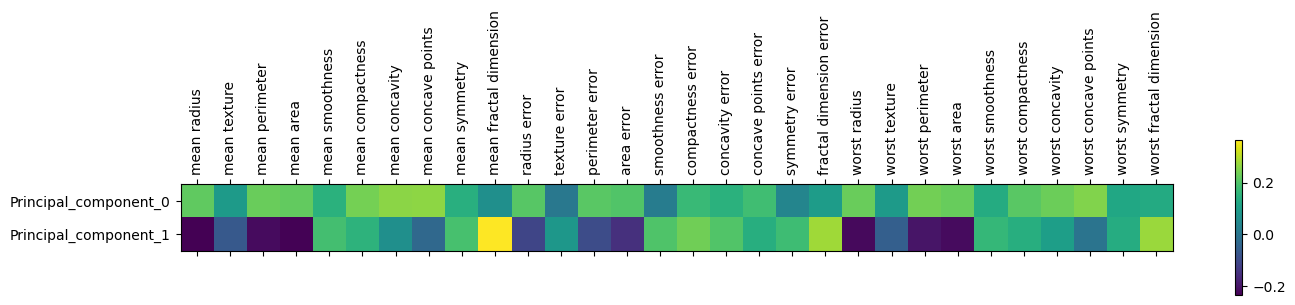

In [30]:
plt.matshow(pca.components_)
plt.xticks(ticks=range(pca.components_.shape[1]),
           labels=feature_names,
           rotation='vertical')
plt.yticks(ticks=range(pca.n_components_),
           labels=pca_names)
plt.colorbar()
plt.show()

<h4>Objasnjena varijansa svake od glavnih komponenti

In [31]:
pca.explained_variance_

array([13.1425886,  5.9362313])

<h4>Udeo objasnjene varijanse svake od glavnih komponenti

In [32]:
pca.explained_variance_ratio_

array([0.43705792, 0.19740988])

ili vizuelno

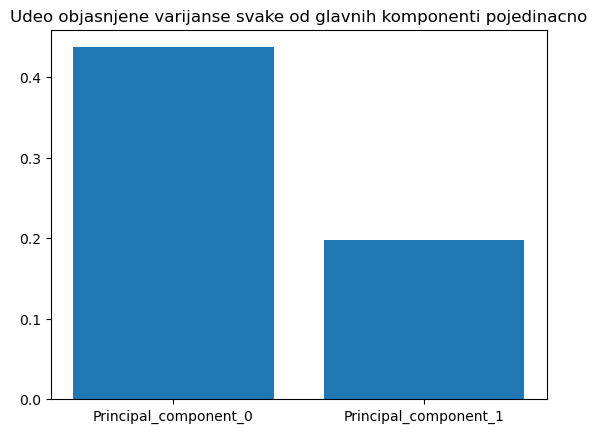

In [33]:
plt.bar(x=pca_names,
        height=pca.explained_variance_ratio_)
plt.title('Udeo objasnjene varijanse svake od glavnih komponenti pojedinacno')
plt.show()

In [34]:
import numpy as np

In [35]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

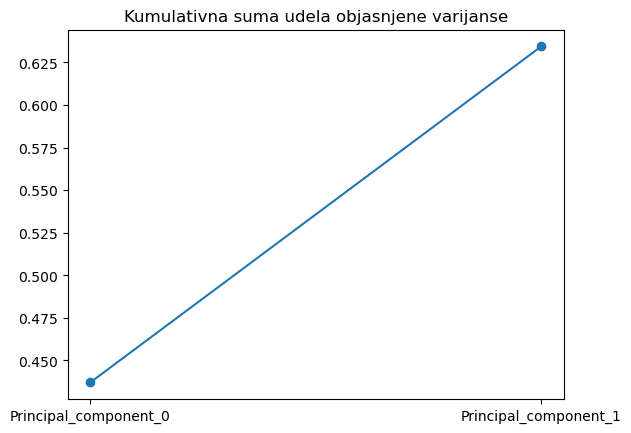

In [36]:
plt.plot(pca_names, cumulative_variance_ratio, marker='o')
plt.title('Kumulativna suma udela objasnjene varijanse')
plt.show()

Prve dve glavne komponente objasnjavaju ukupno 63% ukupne varijanse podataka

In [37]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [38]:
X_train_pca.shape

(426, 2)

<h4>Dve glavne komponente su nasi novi atributi

In [39]:
from matplotlib import pyplot as plt

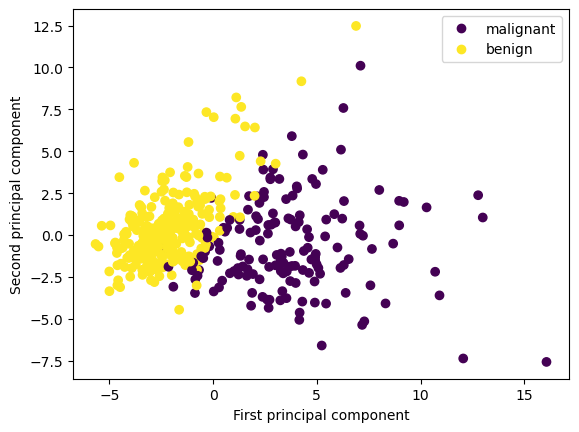

In [40]:
scatter = plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.legend(handles=scatter.legend_elements()[0], labels=class_names.tolist())
plt.show()

<h4>Mozemo da odredimo vrednosti polaznih atributa na osnovu vrednosti novih atributa

In [41]:
pca.inverse_transform(np.random.random(size=(1,2)))

array([[-0.06097622,  0.00320058, -0.03851121, -0.05511847,  0.27514927,
         0.31170737,  0.2441511 ,  0.15743458,  0.27665391,  0.38060326,
         0.04753764,  0.08000715,  0.06348724,  0.00281403,  0.19566217,
         0.3380666 ,  0.29024619,  0.2592612 ,  0.19016368,  0.32659357,
        -0.04078478,  0.01653679, -0.01621733, -0.04002438,  0.24770325,
         0.28024285,  0.25657144,  0.17440324,  0.21258223,  0.34779222]])